# 분산분석
* 세 개 이상의 평균치의 비교
* 평균비교인데 왜 분산을 비교할까?
* 세 개의 모집단 비교 : 2개씩 묶어서 가설검정 시 문제가 생긴다.
	* 종합적 해석 불가. 1종 오류가 높아지는 단점이 존재.
	* 따라서 동시비교를 해야함.  
$$H_0 : \mu_1 \neq \mu_2 \neq \mu_3~~vs~~H_1 : not~H_0$$ 
* 이후 사후검정 진행

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway

## 요인과 처리
* 요인 : 변수
* 처리 : 요인을 몇 개의 단위로 구분한 것.
* 요인이 1개인 분산분석 : 일원 분산분석 (one-way ANOVA)
* 요인이 2개인 분산분석 : 이원 분산분석 (two-way ANOVA)

## 분산분석의 원리 
* '집단마다의 평균'와 '전체 평균'의 분산 : 집단 간 편차
* 집단 1 속 $x_i$ 와 집단 1의 평균의 분산 : 집단 내 편차
* 전체 변동 = 집단 간 편차 + 집단 내 편차

$$(X_{ij} - \bar{X})^2 = (X_{ij} - \bar{X_i})^2 + (X_{i} - \bar{X})^2$$


* 사과를 두 집단으로 나눠서 A 집단은 비료를 주고, B 집단은 비료를 주지 않았다.
* 그런데, B 집단 안에서도 사과의 수확량은 차이가 났다.
* 그렇다면, A와 B의 차이 (집단 간 차이) => 설명 가능한 변동
* B 안에서의 차이 (집단 내 차이) => 설명 불가능한 변동

## 모수적 방법
### 1. 일원 분산분석 : 정규성, 등분산성  

<정규성 검정 / 등분산 검정>
* 정규성 검정
* Bartelett's test / Levene's test
 
<사후검정, 다중비교>
* 등분산 만족 시, scheffe, bonferroni, tukey HSD, SNK, Duncan, LSD
* 집단별로 표본 수가 같으면, tukey HSD, Duncan, scheffe
* 집단별로 표본의 수가 다르면, scheffe
 
<비모수적 방법>
* 크루스칼-윌리스 검정

In [3]:
# example 1. 비료에 따른 사과의 수확량 차이
a = [25, 29, 27, 23, 22, 25]
b = [34, 36, 38, 32, 35, 35]
c = [29, 31, 27, 26, 25, 27]

In [4]:
a1 = pd.DataFrame(a)
b1 = pd.DataFrame(b)
c1 = pd.DataFrame(c)

a2 = pd.Series(a)
b2 = pd.Series(b)
c2 = pd.Series(c)

In [5]:
print(a1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes
None


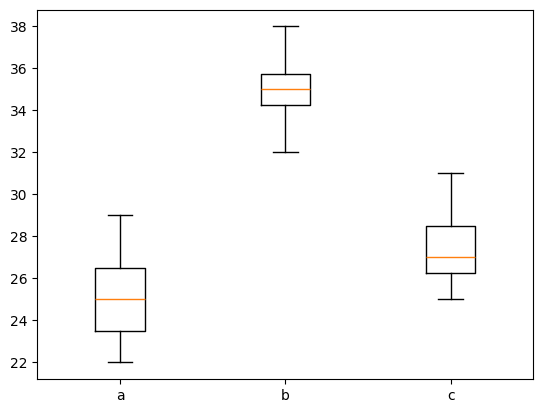

In [8]:
df = pd.DataFrame({'a' : a, 'b' : b, 'c' : c})
# print(df.describe())
ax = plt.boxplot(df, vert=True, meanline=True)
ax = plt.xticks([1, 2, 3], ['a', 'b', 'c'])
plt.show()

### 정규성 검정

In [23]:
def normality_test(data):
	test_stat, pvalue = stats.shapiro(data)
	print(pvalue)

normality_test(df['a'])
normality_test(df['b'])
normality_test(df['c'])

0.8441123854385228
0.9328373375630236
0.659085504909071


### 등분산성 검정

In [26]:
test_stat, pvalue = stats.bartlett(df['a'], df['b'], df['c'])
print(pvalue)

0.8607435648095305


In [27]:
test_stat, pvalue = stats.levene(df['a'], df['b'], df['c'])
print(pvalue)

0.8425719753065651


### 예시 1 : 데이터프레임 활용

In [32]:
df = pd.DataFrame({'product' : a + b + c,
				   'group' : np.repeat(['a', 'b', 'c'], repeats=6)})

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('product ~ group', data=df).fit()
result = sm.stats.anova_lm(model)
print(result)

            df      sum_sq     mean_sq          F    PR(>F)
group      2.0  316.777778  158.388889  31.124454  0.000005
Residual  15.0   76.333333    5.088889        NaN       NaN


In [44]:
test_stat = result.iloc[0, 3]
pvalue = result.iloc[0, 4]

print(f"test_stat : {test_stat}")
print(f"pvalue : {pvalue}")

test_stat : 31.124454148471635
pvalue : 4.586610000570138e-06


### 사후검정 : turkey HSD

In [45]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tucky = pairwise_tukeyhsd(endog=df['product'], groups=df['group'], alpha=0.05)
print(tucky)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     a      b   9.8333    0.0  6.4503 13.2163   True
     a      c   2.3333 0.2059 -1.0497  5.7163  False
     b      c     -7.5 0.0001 -10.883  -4.117   True
----------------------------------------------------


## 비모수적 방법

In [46]:
# 크루스칼-윌리스
test_stat, pvalue = stats.kruskal(a, b, c)
print(f"test_stat : {test_stat}, pvalue : {pvalue}")

test_stat : 12.553527980535279, pvalue : 0.0018794727562668227
